# Overview and format data

In [1]:
import pandas as pd

# Import data
df = pd.read_csv('divorce_data.csv')
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [2]:
# Check type of data in each column

df.dtypes

Q1         int64
Q2         int64
Q3         int64
Q4         int64
Q5         int64
Q6         int64
Q7         int64
Q8         int64
Q9         int64
Q10        int64
Q11        int64
Q12        int64
Q13        int64
Q14        int64
Q15        int64
Q16        int64
Q17        int64
Q18        int64
Q19        int64
Q20        int64
Q21        int64
Q22        int64
Q23        int64
Q24        int64
Q25        int64
Q26        int64
Q27        int64
Q28        int64
Q29        int64
Q30        int64
Q31        int64
Q32        int64
Q33        int64
Q34        int64
Q35        int64
Q36        int64
Q37        int64
Q38        int64
Q39        int64
Q40        int64
Q41        int64
Q42        int64
Q43        int64
Q44        int64
Q45        int64
Q46        int64
Q47        int64
Q48        int64
Q49        int64
Q50        int64
Q51        int64
Q52        int64
Q53        int64
Q54        int64
Divorce    int64
dtype: object

In [3]:
# Check each column has null value or not?

df.isnull().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

In [4]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Divorce'],
      dtype='object')

# Create suitable model

In [5]:
X = df.drop(['Divorce'],axis=1)
y = df[['Divorce']]

not_divorce=len(y[y['Divorce']==0])
divorce=len(y[y['Divorce']==1])

print('Amount of not_divorce : {}'.format(not_divorce))
print('Amount of divorce : {}'.format(divorce))

Amount of not_divorce : 86
Amount of divorce : 84


From above , My data is balance data

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# Candidated algorithm models
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('kNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier(random_state=0)))
models.append(('DT', DecisionTreeClassifier(random_state=0)))
models.append(('MLP', MLPClassifier( hidden_layer_sizes=32, max_iter=1000, random_state=0)))
models.append(('GNB', GaussianNB()))
models.append(('XGB', XGBClassifier(random_state=0)))

names = []
results = []

for name, model in models:
    scores = cross_val_score(model, X, y.values.ravel(), cv=10, scoring='accuracy')
    names.append(name)
    results.append(scores)
    print('{:4} -> Accuracy : {:.3f} % (Std : {:.3f} %)'.format(name, scores.mean()*100, scores.std()*100))

LR   -> Accuracy : 98.235 % (Std : 5.294 %)
kNN  -> Accuracy : 97.647 % (Std : 5.391 %)
SVC  -> Accuracy : 97.647 % (Std : 5.391 %)
RFC  -> Accuracy : 97.647 % (Std : 5.391 %)
DT   -> Accuracy : 95.882 % (Std : 5.912 %)
MLP  -> Accuracy : 97.059 % (Std : 5.423 %)
GNB  -> Accuracy : 97.059 % (Std : 6.028 %)
XGB  -> Accuracy : 97.647 % (Std : 5.391 %)


From above , I choose Logistic regression because it has maximum accuracy and minimum std among others

Next step -> Tuning process

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to optimize
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
                'dual': [True, False],
                'fit_intercept': [True, False],
                'solver': ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky', 'sag', 'saga'],
                'multi_class': ['auto', 'ovr', 'multinomial'],
                'warm_start': [True, False],
                'max_iter': [10000]
            }

# Perform the grid search
grid_search = GridSearchCV(LogisticRegression(), 
                            param_grid, 
                            scoring='accuracy', 
                            cv=10, 
                            verbose=1) 
grid_search.fit(X, y.values.ravel())

print(f"Best hyperparameters: {grid_search.best_params_}")
print(grid_search.best_score_)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Best hyperparameters: {'dual': False, 'fit_intercept': True, 'max_iter': 10000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs', 'warm_start': True}
0.9823529411764707


c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4280 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Panupong Jindarat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c

From above , I get the best model which has parameter like those 

Then , I check my tuning model is overfitting or not

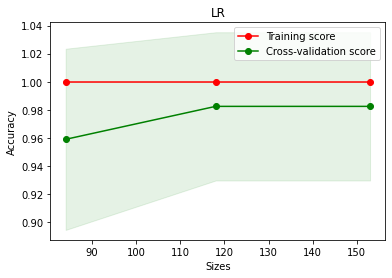

In [8]:
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import numpy as np

LR =  LogisticRegression(**grid_search.best_params_)

train_sizes, train_scores, test_scores = learning_curve(LR,
                                                        X, y.values.ravel(), cv=10, train_sizes=np.linspace(.1, 1.0, 5),scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('LR')
plt.ylabel('Accuracy')
plt.xlabel('Sizes')
plt.legend(loc="best")
plt.show()

As you can see from graph above , there is no large gap between these two lines from LR model 

So I choose it as the best model for divorce prediction

# Feature importance and Feature selection

In [9]:
X = df.drop(['Divorce'],axis=1)
y = df[['Divorce']]

LR.fit(X,y.values.ravel())

feature_importances = LR.coef_

# calculate absolute feature importance scores across all classes
feature_importances_abs = np.absolute(feature_importances[0])

# create a dictionary of feature names and their corresponding absolute importance scores
feature_scores = {X.columns[i] : score for i, score in enumerate(feature_importances_abs)}

# sort feature names based on their scores
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# print the sorted feature names with their scores
for feature, score in sorted_features:
    print('{:<5} : {:<5}'.format(feature, score.round(3)))

Q40   : 0.596
Q26   : 0.493
Q49   : 0.458
Q44   : 0.372
Q31   : 0.367
Q17   : 0.358
Q3    : 0.351
Q28   : 0.337
Q6    : 0.328
Q39   : 0.309
Q20   : 0.306
Q15   : 0.303
Q53   : 0.302
Q18   : 0.299
Q2    : 0.283
Q19   : 0.278
Q1    : 0.268
Q52   : 0.247
Q41   : 0.225
Q30   : 0.208
Q38   : 0.207
Q14   : 0.206
Q36   : 0.205
Q34   : 0.202
Q33   : 0.196
Q29   : 0.189
Q32   : 0.182
Q50   : 0.181
Q42   : 0.161
Q5    : 0.161
Q12   : 0.152
Q43   : 0.15 
Q16   : 0.149
Q25   : 0.148
Q4    : 0.14 
Q11   : 0.135
Q27   : 0.116
Q21   : 0.096
Q9    : 0.093
Q13   : 0.089
Q8    : 0.077
Q48   : 0.072
Q24   : 0.069
Q35   : 0.069
Q47   : 0.066
Q54   : 0.052
Q46   : 0.047
Q10   : 0.044
Q23   : 0.034
Q37   : 0.027
Q22   : 0.025
Q45   : 0.013
Q51   : 0.005
Q7    : 0.001


From result above , 

feature Q40 has the highest score of 0.596, which means that it has the greatest impact on the target variable. 

Similarly, Q26, Q49, Q44, and Q31 also have high scores, indicating that they are important features. 

On the other hand, features with near zero scores have little or no impact on the target variable.

The next step -> try to keep top .... features and evaluate accuracy

In [10]:
# Create an empty list to store the accuracy and std of each set of selected features
accuracy_std_list = []

for i in range(len(sorted_features)):
    col = []
    for j in range(len(sorted_features[:i+1])):
        col.append(sorted_features[j][0])

    X = df[col]
    y = df[['Divorce']]

    scores = cross_val_score(LR, X, y.values.ravel(), cv=10, scoring='accuracy')
    accuracy = scores.mean()
    std = score.std()
    accuracy_std_list.append((i+1, accuracy,std))

# Sort the accuracy list in descending order based on accuracy
accuracy_std_list = sorted(accuracy_std_list, key=lambda x: x[1], reverse=True)

for n_top, score , std in accuracy_std_list:
    print('Top {:<5} -> Accuracy {:.3f} % (Std {:.3f} %)'.format(n_top, score*100,std*100))

print('-'*40)

top_features = []

for feature_tuple in sorted_features[:accuracy_std_list[0][0]]:
    top_features.append(feature_tuple[0])

# Print the top feature names
print(top_features)

Top 3     -> Accuracy 99.412 % (Std 0.000 %)
Top 10    -> Accuracy 99.412 % (Std 0.000 %)
Top 11    -> Accuracy 99.412 % (Std 0.000 %)
Top 2     -> Accuracy 98.824 % (Std 0.000 %)
Top 4     -> Accuracy 98.824 % (Std 0.000 %)
Top 5     -> Accuracy 98.824 % (Std 0.000 %)
Top 7     -> Accuracy 98.824 % (Std 0.000 %)
Top 8     -> Accuracy 98.824 % (Std 0.000 %)
Top 9     -> Accuracy 98.824 % (Std 0.000 %)
Top 12    -> Accuracy 98.824 % (Std 0.000 %)
Top 13    -> Accuracy 98.824 % (Std 0.000 %)
Top 14    -> Accuracy 98.824 % (Std 0.000 %)
Top 15    -> Accuracy 98.824 % (Std 0.000 %)
Top 6     -> Accuracy 98.235 % (Std 0.000 %)
Top 16    -> Accuracy 98.235 % (Std 0.000 %)
Top 17    -> Accuracy 98.235 % (Std 0.000 %)
Top 18    -> Accuracy 98.235 % (Std 0.000 %)
Top 19    -> Accuracy 98.235 % (Std 0.000 %)
Top 20    -> Accuracy 98.235 % (Std 0.000 %)
Top 21    -> Accuracy 98.235 % (Std 0.000 %)
Top 22    -> Accuracy 98.235 % (Std 0.000 %)
Top 23    -> Accuracy 98.235 % (Std 0.000 %)
Top 24    

From result above , I select ['Q40', 'Q26', 'Q49'] as features to predict divorce

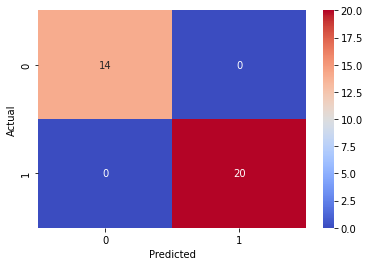

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        20

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

----------------------------------------


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# top_features = ['Q40', 'Q26', 'Q49']

X = df[top_features]
y = df[['Divorce']]

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

### Predict Divorce ###

LR = LogisticRegression(**grid_search.best_params_)

LR.fit(X_train, y_train)

y_pred_proba = LR.predict_proba(X_test)[:, 1]  # predicted probabilities of positive class

y_pred = (y_pred_proba >= 0.5).astype(int)  # predicted class labels
cm = confusion_matrix(y_test, y_pred)  # confusion matrix

sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))
print('-'*40)